# Clustering(Lesson 1)
## K-Means(part 1)

### First of all import needed packages

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import random
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Create dataset

In [3]:
# If we use 0 for seed, each time , we get the same data as before, unless you change the seed
# If seed is not given, it gives you random values using current time
# Use this to always get same values :
np.random.seed(0)

In [4]:
# number of features(n_featurs) mean number of dimentions > by default : 2(2D)
# center = [x,y] is 2D
x , y = make_blobs(n_samples=5000,centers=[[4,4],[-2,-1],[2,-3],[1,1]],cluster_std=0.9)

In [5]:
print('Xs : \n',x)
print('------------')
print('Ys : \n',y,'\n')

Xs : 
 [[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
------------
Ys : 
 [1 2 2 ... 0 1 1] 



In [6]:
# Explanation :
for i in range(x.shape[0]) :
    x_ = x[i,0]
    y_ = x[i,1]
    c = y[i]
    print(f'point {i+1} with x = {x_} and y = {y_} is in center {c}\n')
    if i+1 >= 3 :
        break

point 1 with x = -1.8215056465801926 and y = 0.07098024481624443 is in center 1

point 2 with x = 2.167326207666161 and y = -2.93199608366877 is in center 2

point 3 with x = 0.846515796408108 and y = -3.2607530542075396 is in center 2



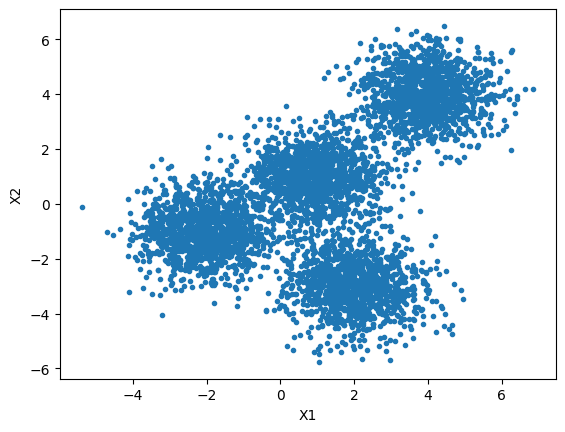

In [7]:
# x[:,0] means all x values of column 0
plt.scatter(x[:,0],x[:,1],marker='.')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Create and run your model

In [8]:
K_means = KMeans(init='k-means++',n_clusters=4,n_init=12)

In [9]:
K_means_model = K_means.fit(x)

In [10]:
K_means_labels = K_means.labels_
print(K_means_labels)

[0 3 3 ... 1 0 0]


In [11]:
K_means_cluster_centers = K_means.cluster_centers_
print(K_means_cluster_centers)

[[-2.03743147 -0.99782524]
 [ 3.97334234  3.98758687]
 [ 0.96900523  0.98370298]
 [ 1.99741008 -3.01666822]]


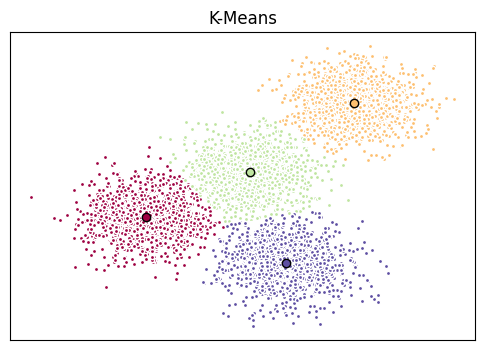

In [12]:
figure = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(K_means_labels))))
ax = figure.add_subplot(1,1,1)
for k , col in zip(range(len(K_means_cluster_centers)),colors) :
    my_members = (K_means_labels == k)
    cluster_center = K_means_cluster_centers[k]
    ax.plot(x[my_members,0],x[my_members,1],'w',markerfacecolor=col,marker='.')
    ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,
            markeredgecolor = 'k'
            ,markersize=6)
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()